# Lab 1
### Kirill Zakharov

In [1]:
# !pip install PyWavelets
# !pip install nolds
# !pip install git+https://github.com/manu-mannattil/nolitsa.git
# !python -m pip install -U giotto-tda

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline
from Libraries.features import CHurst, CEmbDim, KSEntr, HurstTraj, DimEmb
from Libraries.Util import Norm01
from Libraries.Autoregr import VARExplore
from Libraries.Localapp import LAprExplore
from Libraries.Spectrum import MSSAExplore
from Libraries.ChooChoo import ChooChooExplore

from sklearn.manifold import TSNE
import plotly.express as px
import nolds
from nolitsa import dimension, delay
from giottotda.gtda.time_series import embedding, TakensEmbedding

plt.style.use('ggplot')

/Users/kirillzakharov/Desktop/Master Degree ITMO/Mathematical tools/pymssa/mssa.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
data = pd.read_csv('zeus.us.txt')['Close'].values

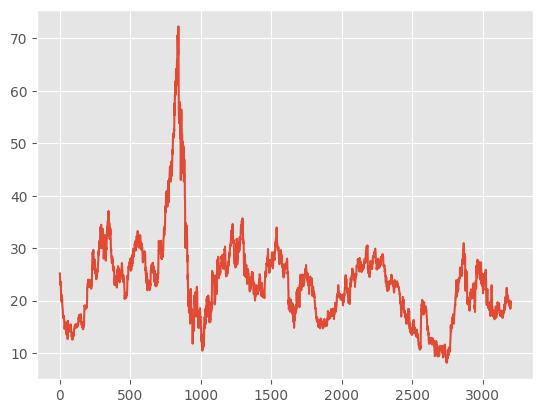

In [4]:
plt.plot(data)

plt.show()

In [5]:
nolds.corr_dim(data, 10)

3.444099760731923

In [6]:
nolds.hurst_rs(data)

0.9426639780884895

In [8]:
KSEntr(data)

9.937956981309764

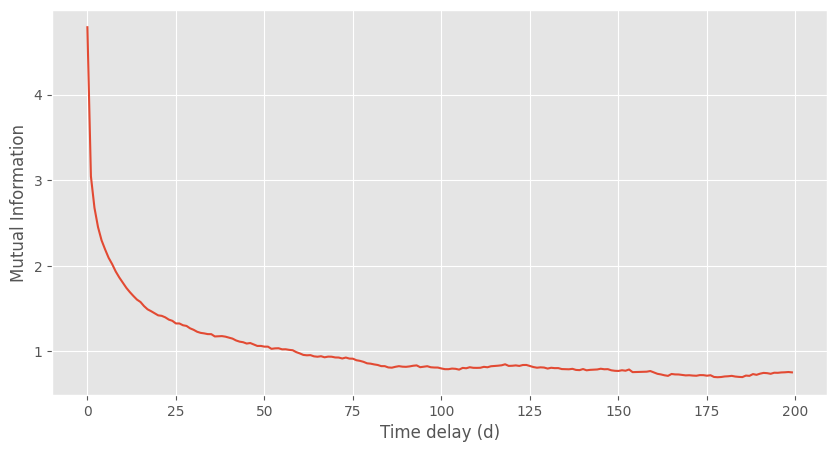

In [9]:
plt.subplots(figsize=(10,5), dpi=100)

plt.plot(delay.dmi(data, maxtau=200))
plt.xlabel('Time delay (d)')
plt.ylabel('Mutual Information')

plt.show()

In [10]:
mi = np.diff(delay.dmi(data, maxtau=200))
    
np.where(mi > 0)[0][0]

36

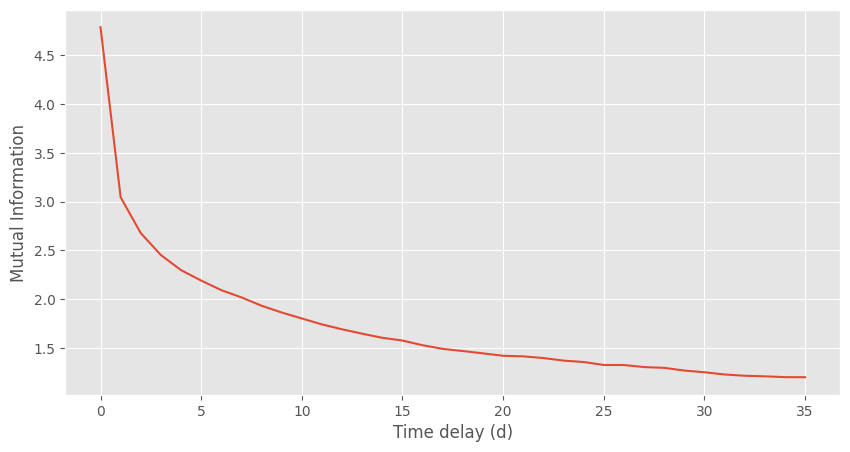

In [11]:
plt.subplots(figsize=(10,5), dpi=100)

plt.plot(delay.dmi(data, maxtau=36))
plt.xlabel('Time delay (d)')
plt.ylabel('Mutual Information')

plt.show()

In [12]:
dim = np.arange(1, 10)
f1, f2, f3 = dimension.fnn(data, tau=36, dim=dim)

np.where(f1 < 0.2)[0][0] + 1

3

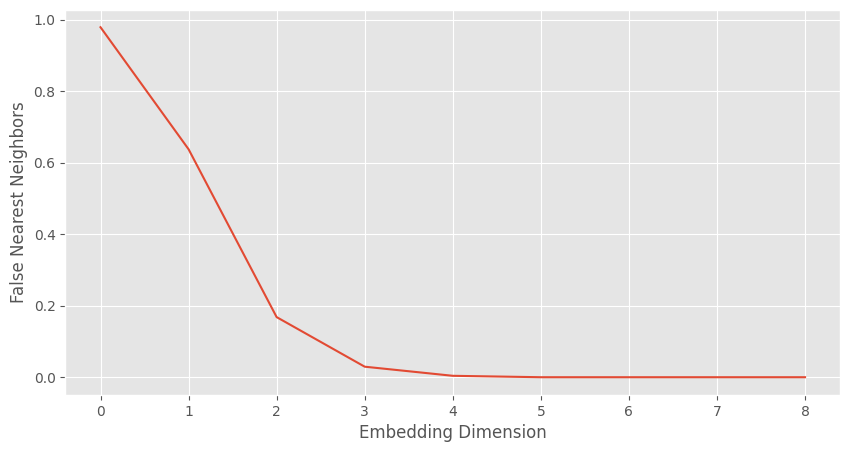

In [13]:
plt.subplots(figsize=(10,5), dpi=100)

dim = np.arange(1, 10)
f1, f2, f3 = dimension.fnn(data, tau=36, dim=dim)

plt.plot(f1)
plt.xlabel('Embedding Dimension')
plt.ylabel('False Nearest Neighbors')

plt.show()

### При помощи самостоятельных методов

In [14]:
def takens(data, dim=2, delay=2):
    emb = np.array([data[0:len(data) - delay*dim]])
    for i in range(1, dim):
        emb = np.append(emb, [data[i*delay:len(data) - delay*(dim - i)]], axis=0)
        
    return emb.T

In [15]:
phase_traj_custom = takens(data, dim=3, delay=36)

In [16]:
fig = px.line_3d(pd.DataFrame(phase_traj_custom, columns=['x', 'y', 'z']), x="x", y="y", z="z")

fig.show()

In [17]:
tsne = TSNE(n_components=2)
phase_traj_proj = tsne.fit_transform(phase_traj_custom)

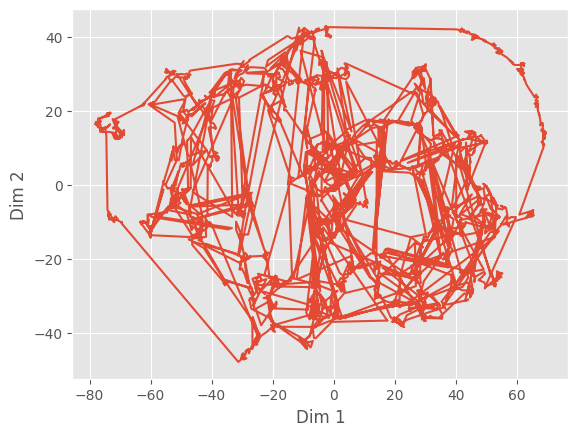

In [18]:
plt.plot(phase_traj_proj[:, 0], phase_traj_proj[:, 1])

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

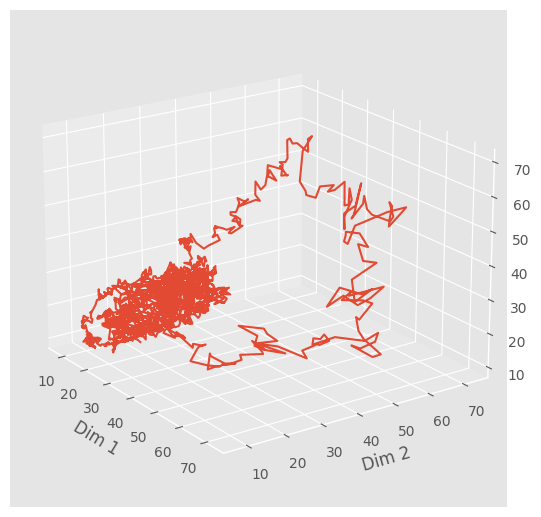

In [19]:
ax = plt.figure(figsize=(5, 5), dpi=100).add_subplot(projection='3d')

ax.plot(phase_traj_custom[:, 0], phase_traj_custom[:, 1], phase_traj_custom[:, 2])

ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_zlabel('Dim 3')

ax.view_init(elev=20., azim=-35, roll=0)
plt.tight_layout(pad=0.1)
plt.show()

### Из библиотеки Giotto

In [20]:
optimal_time_delay, optimal_embedding_dimension = embedding.takens_embedding_optimal_parameters(
    data, 100, 10, stride=1
    )

In [21]:
optimal_time_delay

98

In [22]:
optimal_embedding_dimension

6

#### Двухмерное фазовое пространство

In [23]:
phase_traj = TakensEmbedding(optimal_time_delay, optimal_embedding_dimension).fit_transform(data.reshape(1, -1))[0]

In [24]:
tsne = TSNE(n_components=2)
phase_traj_proj = tsne.fit_transform(phase_traj)

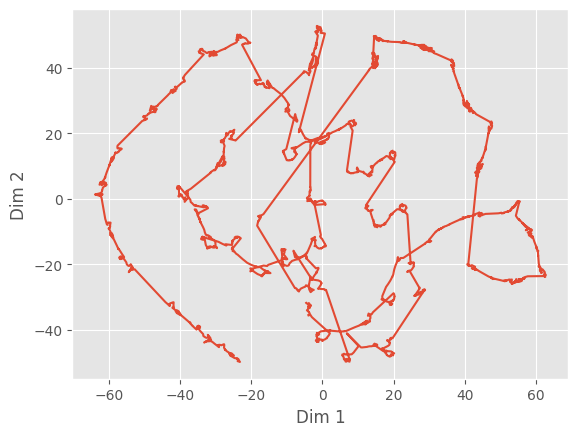

In [25]:
plt.plot(phase_traj_proj[:, 0], phase_traj_proj[:, 1])

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

#### Трехмерное фазовое пространство

In [26]:
phase_traj = TakensEmbedding(optimal_time_delay, optimal_embedding_dimension).fit_transform(data.reshape(1, -1))[0]
tsne = TSNE(n_components=3)
phase_traj_proj = tsne.fit_transform(phase_traj)

In [27]:
fig = px.line_3d(pd.DataFrame(phase_traj_proj, columns=['x', 'y', 'z']), x="x", y="y", z="z")

fig.show()